# 山东大学计算机科学与技术学院 可视化技术 课程实验报告
## 学号： 201900150221 班级：智能19
## 实验题目 实现pca t-sne isomap 

## 步骤一 体验tensorflow的降维
首先下载数据集abalone,此数据集用来通过物理测量预测鲍鱼的年龄，而在我的实验中，我将鲍鱼的性别作为分类的label,对其他属性信息进行降维，在导入之前将其处理成为tsv格式文件
- 数据集PCA降维效果
![本地路径](pca.png)


可以看到数据集降维的效果并不是特别好

- 数据集t-sne降维效果
![本地路径](tsne.png)

当迭代次数较少的时候，各数据集其实并不能较好的分开,当迭代次数逐渐增大的时候其实可以较好地分离不同label的数据

- 数据集UMAP降维效果
![本地路径](umap.png)

可以看到UMAP降维后的效果很奇怪

- 数据集custom降维效果
![本地路径](custom.png)

custom降维效果看不出来和原数据有什么区别
## 步骤2 降维比较tsne，pca，isomap等方法的区别
这里仍使用上面的数据进行降维可视化，第一列为label
### 1 建立工程，导入sklearn 相关工具包

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.manifold import TSNE
import numpy as np

### 2 加载数据进行处理

In [2]:
data = pd.read_csv("abalone.csv")
print(data.shape)
data

(4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


可以看到数据集为八维，无法对原数据进行可视化，然后将第一列性别数据作为label进行分类，并进行可视化

In [3]:
y = data['Sex']#label
X = data.drop('Sex',axis=1, inplace=False).values#输入数据
print(X.shape)

(4177, 8)


### 3 查看数据相关性
将输入数据X中的各个属性进行相关性分析，将彼此之间的关系映射到0-1之间，代表线性相关
绘制相关性散度矩阵如下：

In [4]:
#散度矩阵
data.corr()
data.corr().applymap( lambda x: int(x* 100)/ 100)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.00,0.98,0.82,0.92,0.89,0.90,0.89,0.55
Diameter,0.98,1.00,0.83,0.92,0.89,0.89,0.90,0.57
Height,0.82,0.83,1.00,0.81,0.77,0.79,0.81,0.55
Whole weight,0.92,0.92,0.81,1.00,0.96,0.96,0.95,0.54
Shucked weight,0.89,0.89,0.77,0.96,1.00,0.93,0.88,0.42
Viscera weight,0.90,0.89,0.79,0.96,0.93,1.00,0.90,0.50
Shell weight,0.89,0.90,0.81,0.95,0.88,0.90,1.00,0.62
Rings,0.55,0.57,0.55,0.54,0.42,0.50,0.62,1.00


*` PCA`是一种将n维数据正交分解到k维的降维方法，选择了方差最大的k个方向作为数据维度保留方向，是一种由原空间线性组合降维的方法
PCA 的算法步骤 

设有 m 条 n 维数据，将原始数据按列组成 n 行 m 列矩阵 X；

将 X 的每一行进行零均值化，即减去这一行的均值，求出协方差矩阵；

求出协方差矩阵的特征值及对应的特征向量；

将特征向量按对应特征值大小从上到下按行排列成矩阵，取前 k 行组成矩阵 P，即为降维到 k 维后的数据。

### 4 PCA降维

C:\Users\zjh15\AppData\Local\Temp/ipykernel_1396/1987151238.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


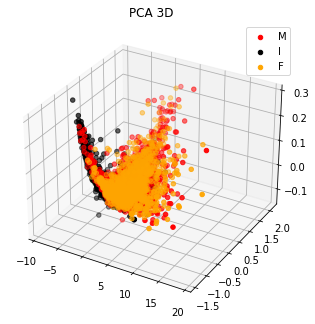

In [5]:
#绘制三维分类图
pca = PCA(n_components=3)  # 实例化
reduced_x = pca.fit_transform(X)  # 拟合模型 获取新矩阵
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reduced_x[y == "M", 0], reduced_x[y == "M", 1],reduced_x[y == "M", 2], c="red", label="M")
ax.scatter(reduced_x[y == "I", 0], reduced_x[y == "I", 1],reduced_x[y == "I", 2] ,c="black", label="I")
ax.scatter(reduced_x[y == "F", 0], reduced_x[y == "F", 1],reduced_x[y == "F", 2], c="orange", label="F")
plt.legend()  # 显示图例
plt.title("PCA 3D")  # 显示标题
plt.show()

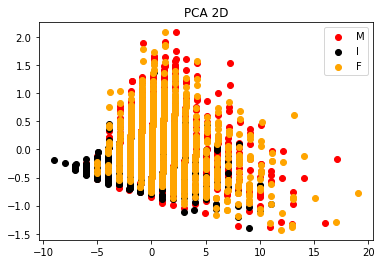

In [6]:
# 绘制二维分类图
pca = PCA(n_components=2)  # 实例化
reduced_x = pca.fit_transform(X)  # 拟合模型 获取新矩阵
fig = plt.figure()
plt.scatter(reduced_x[y == "M", 0], reduced_x[y == "M", 1], c="red", label="M")
plt.scatter(reduced_x[y == "I", 0], reduced_x[y == "I", 1], c="black", label="I")
plt.scatter(reduced_x[y == "F", 0], reduced_x[y == "F", 1], c="orange", label="F")
plt.legend()  # 显示图例
plt.title("PCA 2D")  # 显示标题
plt.show()

可以发现PCA降维的效果不是很好，降维后无法清楚的将三类数据区分

* `MDS（多维缩放）`降维是一组对象之间的距离的可视化表示，也可以当做一种无监督降维算法使用。而Isomap（等度量映射）是在MDS算法的基础上衍生出的一种非迭代的全局优化算法，它是一种等距映射算法，也就是说降维后的点，两两之间距离不变
这个距离是测地距离。Isomap算法没有多少公式推导的内容，它的创新点是引入测地线距离和提出对应的距离计算方法。此算法出发点，是认识到流形在高维空间中，两个样本之间的距离不该直接使用欧式距离计算直线距离，更应该是采用“测地线”距离,就像我们日常生活中送快递的例子，两个城市之间如果没有直达的路线，快递就会经过许多中转站才能送到,Isomap 通过将数据点连接起来构成一个邻接 Graph 来离散地近似原来的流形，而测地距离也相应地通过 Graph 上的最短路径来近似了；

算法步骤：

1.对每个样本点x，计算它的k近邻；同时将x与它的k近邻的距离设置为欧氏距离，与其他点的距离设置为无穷大；

2.调用最短路径算法计算任意两个样本点之间的距离，获得距离矩阵D；

3.调用多维缩放MDS算法，获得样本集在低维空间中的矩阵Z；


### 5 isomap降维

C:\Users\zjh15\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 33 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\zjh15\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\zjh15\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\zjh15\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matri

<Figure size 432x288 with 0 Axes>

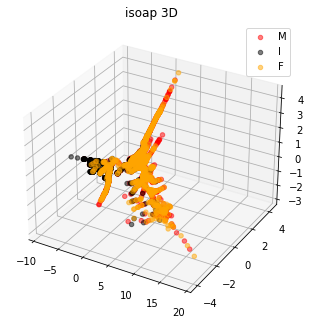

In [7]:
#绘制三维分类图
reduced_x = manifold.Isomap(n_neighbors = 3, n_components = 3).fit_transform(X)
fig=plt.figure("isomap")
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reduced_x[y == "M", 0], reduced_x[y == "M", 1],reduced_x[y == "M", 2], marker='o',c="red", label="M",alpha=0.5)
ax.scatter(reduced_x[y == "I", 0], reduced_x[y == "I", 1], reduced_x[y == "I", 2],marker='o',c="black", label="I",alpha=0.5)
ax.scatter(reduced_x[y == "F", 0], reduced_x[y == "F", 1], reduced_x[y == "F", 2],marker='o',c="orange", label="F",alpha=0.5)
plt.legend()  # 显示图例
plt.title("isoap 3D")  # 显示标题
plt.show()

C:\Users\zjh15\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 33 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\zjh15\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\zjh15\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\zjh15\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matri

<Figure size 432x288 with 0 Axes>

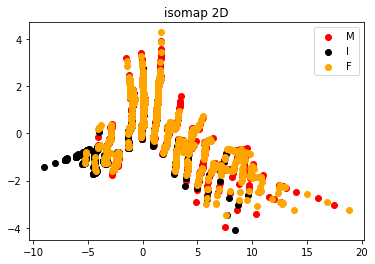

In [8]:
# 绘制二维分类图
reduced_x = manifold.Isomap(n_neighbors = 3, n_components = 2).fit_transform(X)
fig=plt.figure("isomap")
fig = plt.figure()

plt.scatter(reduced_x[y == "M", 0], reduced_x[y == "M", 1], c="red", label="M")
plt.scatter(reduced_x[y == "I", 0], reduced_x[y == "I", 1], c="black", label="I")
plt.scatter(reduced_x[y == "F", 0], reduced_x[y == "F", 1], c="orange", label="F")
plt.legend()  # 显示图例
plt.title("isomap 2D")  # 显示标题
plt.show()

*`t-SNE`全称为t-distributed Stochastic Neighbor Embedding
翻译为t-随机邻近嵌入，它是一种嵌入模型，能够将高维空间中的数据映射到低维空间中，主要用于高维数据的降维和可视化。

t-SNE可以算是目前效果最好的数据降维和可视化方法之一，当我们想对高维数据集进行分类，但又不清楚这个数据集有没有很好的可分性（同类之间间隔小、异类之间间隔大）时，可以通过t-SNE将数据投影到2维或3维空间中观察一下：如果在低维空间中具有可分性，则数据是可分的；如果在低维空间中不可分，则可能是因为数据集本身不可分，或者数据集中的数据不适合投影到低维空间。
t-SNE将数据点之间的相似度转化为条件概率，原始空间中数据点的相似度由高斯联合分布表示，嵌入空间中数据点的相似度由学生t分布表示。

通过原始空间和嵌入空间的联合概率分布的KL散度（用于评估两个分布的相似度的指标，经常用于评估机器学习模型的好坏）来评估嵌入效果的好坏，即将有关KL散度的函数作为损失函数（loss function），通过梯度下降算法最小化损失函数，最终获得收敛结果。要注意t-SNE的缺点很明显：占用内存较多、运行时间长。

### 6 Tsne降维

C:\Users\zjh15\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zjh15\AppData\Local\Temp/ipykernel_1396/919631481.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


<Figure size 432x288 with 0 Axes>

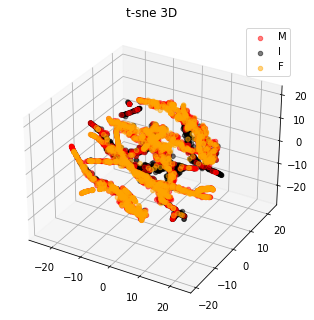

In [10]:
#绘制三维分类图
reduced_x = TSNE(n_components=3,learning_rate=100).fit_transform(X)
fig=plt.figure("isomap")
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reduced_x[y == "M", 0], reduced_x[y == "M", 1],reduced_x[y == "M", 2], marker='o',c="red", label="M",alpha=0.5)
ax.scatter(reduced_x[y == "I", 0], reduced_x[y == "I", 1], reduced_x[y == "I", 2],marker='o',c="black", label="I",alpha=0.5)
ax.scatter(reduced_x[y == "F", 0], reduced_x[y == "F", 1], reduced_x[y == "F", 2],marker='o',c="orange", label="F",alpha=0.5)
plt.legend()  # 显示图例
plt.title("t-sne 3D")  # 显示标题
plt.show()


C:\Users\zjh15\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

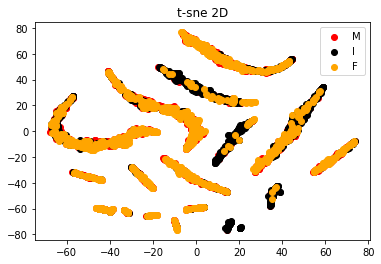

In [11]:
# 绘制二维分类图
reduced_x = TSNE(n_components=2,learning_rate=100).fit_transform(X)
fig=plt.figure("isomap")
fig = plt.figure()

plt.scatter(reduced_x[y == "M", 0], reduced_x[y == "M", 1], c="red", label="M")
plt.scatter(reduced_x[y == "I", 0], reduced_x[y == "I", 1], c="black", label="I")
plt.scatter(reduced_x[y == "F", 0], reduced_x[y == "F", 1], c="orange", label="F")
plt.legend()  # 显示图例
plt.title("t-sne 2D")  # 显示标题
plt.show()

## 步骤三 算法比较
pca相比于其他两种算法计算速度很快，其他两种算法都需要计算距离，所以导致耗费的时间长，样本数量一旦过多或者维度过大往往难以计算。但是pca的算法由于是线性的，所以能力有限，有时候很难处理有些问题。而isomap则需要设置knn算法的超参k，超参的设置也很影响降维的效果
Pca的降维更加兼顾于全局的效果，而isomap则注重于特定流形的学习，而tsne相比之下则更加关注数据局部特征
